In [1]:
pip install numpy scikit-fuzzy pandas scikit-learn

     ------------------------------------ 994.0/994.0 kB 381.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=ff4c59abe9d19fe1c17b215f010ac1c3ad8245900103f5213b47be5ba560e28d
  Stored in directory: c:\users\palla\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from sklearn.preprocessing import MinMaxScaler

In [65]:
data = pd.read_csv("data_set.csv")

In [66]:
data_for_clustering = data.iloc[:1000, 1:] 

In [67]:
data = data.iloc[:1000, 1:] 

In [68]:
data_for_clustering = data_for_clustering.select_dtypes(include=[np.number])

In [69]:
data_for_clustering

,T_image,T_video,T_read,T_audio,T_hierarchies,T_powerpoint,T_abstract,T_concrete,T_result,N_standard_questions_correct,...,T_reading_in_forum,T_solve_excercise,T_submit_assignment,N_group_discussions,T_outlines,Skipped_los,N_next_button_used,T_spent_in_session,N_questions_on_detials,N_questions_on_outlines
0,8.5,8.5,7.5,8.0,3.0,3.5,2.5,7.5,6.5,26.0,...,4.5,7.0,4.5,7.5,14.0,0.5,240.0,19.0,131.0,78.5
1,9.5,10.5,10.5,10.0,2.5,3.0,4.0,3.5,4.5,58.5,...,6.5,9.0,2.5,9.0,9.5,6.5,223.0,23.0,54.0,62.5
2,7.5,10.0,9.5,8.5,5.5,6.0,5.5,5.5,4.5,20.0,...,7.0,11.5,4.0,10.0,11.5,7.5,179.0,24.0,111.0,138.0
3,9.5,8.0,8.0,8.5,3.5,3.0,2.5,4.0,6.0,24.0,...,7.5,8.0,2.5,7.5,7.0,5.5,152.0,24.5,32.5,107.5
4,7.0,11.0,9.5,8.0,6.5,5.5,2.5,5.0,7.0,38.5,...,6.5,8.5,4.0,8.5,11.0,3.0,129.5,21.0,138.0,108.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.5,8.5,10.0,8.5,3.0,2.5,2.0,4.0,7.5,32.5,...,6.5,9.5,3.0,12.0,13.0,7.0,121.5,21.5,92.0,81.5
996,9.5,14.5,12.0,8.5,4.0,6.5,2.5,5.5,7.0,74.0,...,6.0,11.5,2.0,11.5,14.0,10.5,86.0,21.0,72.0,59.0
997,6.5,12.5,10.0,6.5,4.0,4.5,2.0,2.5,7.0,89.5,...,6.0,6.0,4.5,11.5,10.5,11.5,111.5,20.0,69.0,73.5
998,8.5,8.0,5.0,9.5,6.5,4.0,5.5,8.0,7.0,73.0,...,5.0,6.0,3.5,12.5,6.0,11.5,237.5,17.0,93.5,111.5


In [70]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

In [71]:
data_transposed = data_scaled.T

In [72]:
n_clusters = 8

In [120]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_transposed, c=n_clusters, m=5, error=0.005, maxiter=1000, init=None)

In [121]:
cluster_membership = np.argmax(u, axis=0)

In [122]:
cluster_membership 

array([7, 7, 2, 5, 1, 2, 6, 7, 4, 6, 5, 1, 5, 7, 3, 7, 3, 5, 5, 1, 2, 3,
       2, 1, 2, 1, 2, 4, 2, 7, 7, 3, 6, 1, 7, 2, 2, 7, 4, 1, 7, 4, 1, 3,
       7, 0, 5, 4, 0, 0, 2, 2, 1, 1, 1, 6, 4, 5, 3, 1, 4, 3, 1, 2, 4, 2,
       6, 5, 1, 2, 0, 1, 6, 1, 1, 2, 2, 0, 7, 1, 1, 3, 3, 1, 2, 0, 7, 4,
       2, 7, 5, 2, 2, 3, 5, 6, 6, 1, 5, 1, 7, 2, 3, 5, 3, 4, 1, 4, 1, 1,
       3, 4, 2, 3, 3, 7, 3, 3, 1, 4, 6, 4, 2, 7, 7, 1, 2, 1, 7, 2, 2, 0,
       6, 1, 4, 4, 6, 5, 1, 0, 1, 7, 2, 1, 6, 5, 4, 5, 5, 3, 3, 1, 4, 5,
       6, 6, 7, 1, 6, 1, 7, 1, 1, 2, 4, 6, 6, 0, 0, 2, 4, 3, 3, 3, 5, 7,
       5, 2, 7, 7, 7, 5, 4, 1, 0, 1, 7, 2, 6, 5, 6, 5, 7, 7, 4, 3, 4, 3,
       7, 2, 3, 4, 4, 0, 4, 2, 1, 4, 7, 2, 5, 3, 3, 4, 7, 4, 3, 4, 4, 3,
       3, 6, 0, 1, 3, 3, 4, 1, 3, 3, 1, 2, 7, 7, 7, 1, 3, 2, 2, 1, 5, 1,
       7, 6, 7, 6, 2, 3, 2, 6, 7, 4, 1, 1, 4, 7, 4, 3, 7, 3, 6, 5, 6, 7,
       4, 2, 3, 5, 7, 3, 3, 3, 4, 2, 1, 3, 7, 6, 7, 3, 3, 1, 4, 3, 7, 0,
       1, 2, 2, 1, 1, 4, 4, 2, 1, 7, 0, 6, 4, 2, 2,

In [123]:
data['Cluster'] = cluster_membership

In [124]:
print("Cluster Centers:")
print(cntr)

Cluster Centers:
[[0.50004503 0.49829312 0.51113104 0.49366158 0.49841733 0.49469056
  0.48628591 0.50551723 0.49994521 0.50604506 0.50978278 0.50114983
  0.50261724 0.4988966  0.4967614  0.50496841 0.51342459 0.50578407
  0.49868597 0.51647164 0.50648833 0.49273872 0.50236048]
 [0.50001975 0.49833568 0.5111387  0.49377704 0.49835483 0.49475577
  0.48623702 0.50547229 0.50008873 0.50600345 0.5096795  0.50119377
  0.50262523 0.49888333 0.49668843 0.50500588 0.51345457 0.50586363
  0.49870235 0.51644957 0.50653201 0.49274936 0.50229393]
 [0.50004555 0.49828567 0.51115145 0.49365005 0.49845374 0.49468366
  0.48632685 0.50551733 0.49995131 0.50601264 0.50981952 0.50116874
  0.50263491 0.49894987 0.4967492  0.50498776 0.51342861 0.50579558
  0.49864627 0.51641306 0.50643024 0.49271853 0.50234639]
 [0.49990103 0.4982858  0.5112032  0.49372379 0.49844573 0.49469626
  0.48620871 0.50547869 0.49997529 0.50614837 0.50977086 0.50114118
  0.50255576 0.49880448 0.49677061 0.50500581 0.51346733 0.50

In [125]:
print("Membership Matrix:")
print(u)

Membership Matrix:
[[0.12499861 0.12500138 0.12500217 ... 0.12499773 0.12500074 0.12499909]
 [0.125002   0.12499947 0.12499803 ... 0.12500336 0.1250019  0.12500268]
 [0.12499678 0.12499972 0.12500269 ... 0.12499706 0.12499993 0.12499772]
 ...
 [0.12499961 0.12499926 0.12500234 ... 0.12500033 0.12499889 0.12499872]
 [0.12500236 0.12500064 0.12499827 ... 0.12500079 0.12499826 0.12500088]
 [0.1250039  0.12500139 0.12499769 ... 0.12500099 0.12499862 0.12500049]]


In [126]:
print("Cluster Membership for Each Data Point:")
print(cluster_membership)

Cluster Membership for Each Data Point:
[7 7 2 5 1 2 6 7 4 6 5 1 5 7 3 7 3 5 5 1 2 3 2 1 2 1 2 4 2 7 7 3 6 1 7 2 2
 7 4 1 7 4 1 3 7 0 5 4 0 0 2 2 1 1 1 6 4 5 3 1 4 3 1 2 4 2 6 5 1 2 0 1 6 1
 1 2 2 0 7 1 1 3 3 1 2 0 7 4 2 7 5 2 2 3 5 6 6 1 5 1 7 2 3 5 3 4 1 4 1 1 3
 4 2 3 3 7 3 3 1 4 6 4 2 7 7 1 2 1 7 2 2 0 6 1 4 4 6 5 1 0 1 7 2 1 6 5 4 5
 5 3 3 1 4 5 6 6 7 1 6 1 7 1 1 2 4 6 6 0 0 2 4 3 3 3 5 7 5 2 7 7 7 5 4 1 0
 1 7 2 6 5 6 5 7 7 4 3 4 3 7 2 3 4 4 0 4 2 1 4 7 2 5 3 3 4 7 4 3 4 4 3 3 6
 0 1 3 3 4 1 3 3 1 2 7 7 7 1 3 2 2 1 5 1 7 6 7 6 2 3 2 6 7 4 1 1 4 7 4 3 7
 3 6 5 6 7 4 2 3 5 7 3 3 3 4 2 1 3 7 6 7 3 3 1 4 3 7 0 1 2 2 1 1 4 4 2 1 7
 0 6 4 2 2 4 2 0 4 7 7 4 6 5 4 4 0 5 1 3 7 0 3 6 2 4 7 3 2 5 3 7 0 7 4 4 6
 6 5 3 6 7 1 7 7 7 3 4 2 1 1 2 4 1 7 6 5 2 1 1 5 4 2 1 3 2 2 7 1 7 1 3 1 6
 4 1 1 1 6 2 5 4 1 4 5 5 3 1 4 6 1 3 1 2 0 7 4 7 3 6 4 3 6 7 2 1 4 3 2 3 1
 7 7 1 2 2 0 4 2 6 6 1 6 1 4 1 2 2 2 7 2 3 3 0 1 6 1 7 4 2 4 7 7 7 3 2 0 7
 2 5 0 1 6 3 5 0 1 2 5 2 6 4 4 4 6 4 5 3 1 4 4 5 5 6 1 6 6 0

In [127]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [134]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_transposed.T)

In [135]:
clustered_data = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
clustered_data['Cluster'] = cluster_membership

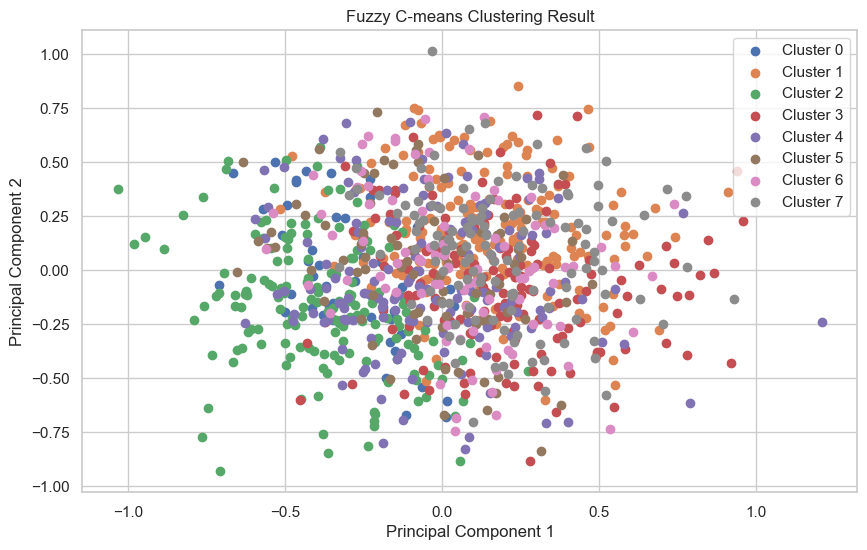

In [136]:
plt.figure(figsize=(10, 6))
for cluster in range(8):  # Assuming 8 clusters
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')
plt.title('Fuzzy C-means Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [137]:
print("Fuzzy Partition Coefficient (FPC):", fpc)

Fuzzy Partition Coefficient (FPC): 0.12500000002675413


In [138]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_transposed.T, cluster_membership, metric='euclidean')
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.013806185548192696


In [139]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(data_transposed.T, cluster_membership)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 4.222566589941727
